In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA

In [38]:
data = pd.read_csv('shop_Customers.csv')
data.head(5)

,ID,SEX,AGE,Salary (k$),SC (%)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           200 non-null    int64 
 1   SEX          200 non-null    object
 2   AGE          200 non-null    int64 
 3   Salary (k$)  200 non-null    int64 
 4   SC (%)       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [40]:
data_train = data
data_train = data_train.replace(['Male', 'Female'], [1,0])
data_train.head()

,ID,SEX,AGE,Salary (k$),SC (%)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [41]:
data_train = data_train.drop(['ID'], axis=1)
data_train

,SEX,AGE,Salary (k$),SC (%)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [42]:
X = data_train.to_numpy()

In [43]:
lis = []
for i in range(2,11):
    # fitting our data with deferent value of components with Gaussian Mixture model (2 to 10)
    gm = GMM(n_components=i,covariance_type = 'tied' ,random_state=0).fit(X)
    score = -gm.score(X)
    print(score)
    
    # add model scores with deferent value of components to lis.
    lis.append(score)

14.002027108624667
13.956244075381676
13.767179446465489
13.604530634017529
13.434286024447495
13.426002350899548
13.3742928206645
13.299410872732267
13.350148746421668


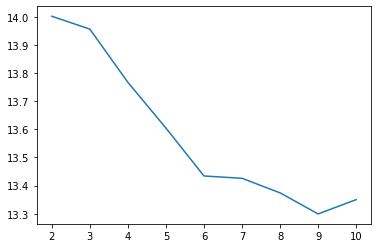

In [44]:
# plot the scores of models to opserve the best component value.
x = range(2,11)
plt.plot(x, lis)
# we see that '6' is the best component value.

In [45]:
# our best model with "n_components=6", with its score
model = GMM(n_components=6,covariance_type = 'tied', random_state=0).fit(X)
model.score(X)

-13.434286024447495

In [46]:
labales = model.fit_predict(X)
labales.shape

(200,)

In [47]:
data_vis = data
# add "consumer category" to the dataset
data_vis.insert(5,'consumer category',labales) 
data_vis

,ID,SEX,AGE,Salary (k$),SC (%),consumer category
0,1,Male,19,15,39,1
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,4
196,197,Female,45,126,28,0
197,198,Male,32,126,74,4
198,199,Male,32,137,18,0


In [48]:
colors = ['#ff0000','#99ff99','#003366','#00cc99','#339933','#ff66ff']
colors_types = [colors[i]for i in labales]
colors_types

['#99ff99',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#99ff99',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#99ff99',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#99ff99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#003366',
 '#00cc99',
 '#ff66ff',
 '#00cc99',
 '#ff66ff',
 '#99ff99',
 '#003366',
 '#99ff99',
 '#ff66ff',
 '#99ff99',
 '#99ff99',
 '#99ff99',
 '#ff66ff',
 '#99ff99',
 '#99ff99',
 '#ff66ff',
 '#ff66ff',
 '#ff66ff',
 '#ff66ff',
 '#ff66ff',
 '#99ff99',
 '#ff66ff',
 '#ff66ff',
 '#99ff99',
 '#ff66ff',
 '#ff66ff',
 '#ff66ff',
 '#99ff99',
 '#ff66ff',
 '#ff66ff',
 '#99ff99',
 '#99ff99',
 '#ff66ff',
 '#ff66ff',
 '#ff66ff',
 '#ff66ff',
 '#ff66ff',
 '#99ff99',
 '#ff66ff',
 '#99ff99',
 '#99ff99',
 '#ff66ff',
 '#ff66ff',
 '#99ff99',
 '#ff66ff',
 '#f

In [49]:
# using pca model to reduce featchers size to 2D to vis the relation between data and category
pca = PCA(n_components=2)
pca.fit(X)
pca_x_y = pca.fit_transform(X)
pca_x_y

array([[-3.18699448e+01, -3.30012521e+01],
       [ 7.64494048e-01, -5.68429006e+01],
       [-5.74082757e+01, -1.31249607e+01],
       [-2.16854252e+00, -5.34785900e+01],
       [-3.21740846e+01, -3.03884119e+01],
       [-2.17695183e+00, -5.22272685e+01],
       [-5.90656895e+01, -9.54376302e+00],
       [ 1.23708622e+01, -6.16180208e+01],
       [-6.63157690e+01, -3.21423160e+00],
       [-5.65556212e+00, -4.72672225e+01],
       [-5.82365979e+01, -9.13418751e+00],
       [ 1.46218043e+01, -6.21075685e+01],
       [-5.51608374e+01, -1.00799251e+01],
       [-3.02878330e-03, -5.01140754e+01],
       [-5.27646657e+01, -1.16807468e+01],
       [ 1.94661180e+00, -5.15222086e+01],
       [-3.45055496e+01, -2.37615402e+01],
       [-7.30493262e+00, -4.35151138e+01],
       [-4.12573070e+01, -1.64734737e+01],
       [ 1.61902860e+01, -5.83001207e+01],
       [-3.27400141e+01, -2.13347966e+01],
       [-9.81885245e-01, -4.44524038e+01],
       [-5.78100898e+01, -1.87057486e+00],
       [-1.

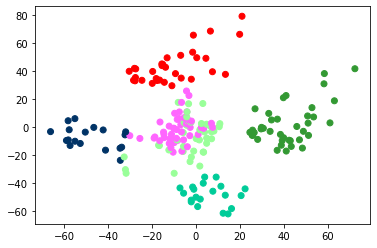

In [50]:
pca_x = pca_x_y[:,0] 
pca_y = pca_x_y[:,1]
plt.scatter(pca_x, pca_y, c = colors_types)